In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy,sparse_categorical_crossentropy
import numpy as np

In [51]:
training_path = "C:/Users/Y N KHADGI/Desktop/data set/training"
validation_path = "C:/Users/Y N KHADGI/Desktop/data set/validation"
testing_path = "C:/Users/Y N KHADGI/Desktop/data set/testing"

#ImageDataGenerator()--> Now, we use Keras's ImageDataGenerator class to create batches of data from the train, valid, and test directories
#ImageDataGenerator.flow_from_directory()--> creates a DirectoryIterator, which generates batches of normalized tensor image data from the respective data directories.
#.flow_from_directory()-->  we first specify the path for the data. We then specify the target_size of the images, which will resize all images to the specified size. The size we specify here is determined by the input size that the neural network expects.
#Classes--> parameter expects a list that contains the underlying class names.(file k nam jo dataset me hai yaha dog or cat nam se hai)
#we also specify shuffel=False only in test set

In [52]:
traning_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=training_path, target_size=(224,224),classes=['dog','cat'],batch_size=10)

validation_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                    .flow_from_directory(directory=validation_path,target_size=(224,224),classes=['dog','cat'],batch_size=10)

testing_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
                .flow_from_directory(directory=testing_path,target_size=(224,224),classes=['dog','cat'],batch_size=10,shuffle=False)

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


#Notice, to ImageDataGenerator for each of the data sets, we specify preprocessing_function=tf.keras.applications.vgg16.preprocess_input. For now, just understand this does an additional processing step on the images. 

# Visualize The Data

In [4]:
img,labels = next(traning_batch)

#### We use this plotting function obtained from TensorFlow's documentation to plot the processed images within our Jupyter notebook.

In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

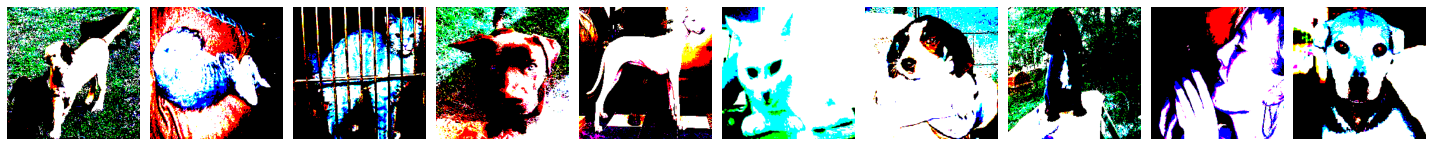

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [6]:
plotImages(img)
print(labels)

# Building a simple CNN

In [7]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train a sample CNN

In [10]:
model.fit(x=traning_batch, validation_data=validation_batch, epochs=4, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 2 steps
Epoch 1/4
6/6 - 17s - loss: 43.3179 - accuracy: 0.5000 - val_loss: 48.9640 - val_accuracy: 0.5500
Epoch 2/4
6/6 - 11s - loss: 98.2799 - accuracy: 0.4667 - val_loss: 123.9317 - val_accuracy: 0.5000
Epoch 3/4
6/6 - 12s - loss: 83.8626 - accuracy: 0.5333 - val_loss: 43.5765 - val_accuracy: 0.5000
Epoch 4/4
6/6 - 12s - loss: 49.9359 - accuracy: 0.6167 - val_loss: 42.8814 - val_accuracy: 0.5500


# Preparing The Test Data

In [11]:
test_img,test_labels = next(traning_batch)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

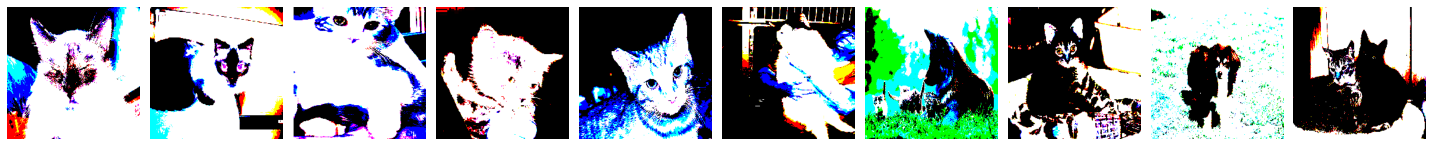

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [12]:
plotImages(test_img)
print(test_labels)

In [13]:
prediction = model.predict(x=testing_batch,verbose=0)

In [14]:
prediction

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [5.2276876e-37, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [5.7481200e-26, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [2.0473413e-21, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [5.6908453e-27, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [2.7881573e-34, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [15]:
np.round(prediction)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

here after we are not ploting confusion matrix

# Fine-Tune VGG16 Image Classifier With Keras | Part 1: Build

In [30]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [31]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [33]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [34]:
model1 = Sequential()
for layers in vgg16_model.layers[:-1]:
    model1.add(layers)

In [35]:
type(model1)

tensorflow.python.keras.engine.sequential.Sequential

In [36]:
for i in model1.layers:
    i.trainable=False

In [37]:
model1.add(Dense(units=2,activation='softmax'))

In [38]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [55]:
model1.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])
#categorical_crossentropy -be use kiya to error. why?

In [56]:
model1.fit(x=traning_batch, validation_data=validation_batch, epochs=5, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 2 steps
Epoch 1/5
6/6 - 78s - loss: 0.8183 - accuracy: 0.6000 - val_loss: 0.5871 - val_accuracy: 0.6000
Epoch 2/5
6/6 - 94s - loss: 0.5455 - accuracy: 0.7833 - val_loss: 0.4394 - val_accuracy: 0.8000
Epoch 3/5
6/6 - 83s - loss: 0.3684 - accuracy: 0.8333 - val_loss: 0.3394 - val_accuracy: 0.8000
Epoch 4/5
6/6 - 83s - loss: 0.2559 - accuracy: 0.9333 - val_loss: 0.2823 - val_accuracy: 0.8000
Epoch 5/5
6/6 - 101s - loss: 0.1865 - accuracy: 0.9333 - val_loss: 0.2458 - val_accuracy: 0.8000


#after this they are useing c